In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')


In [3]:
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64



Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


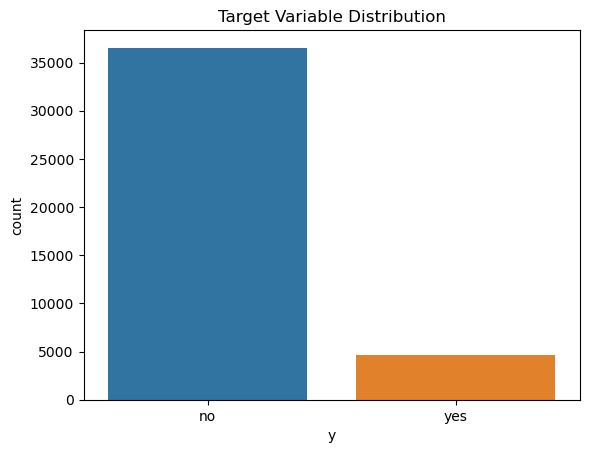

In [5]:
print("\nTarget Variable Distribution:")
print(df['y'].value_counts())

sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()


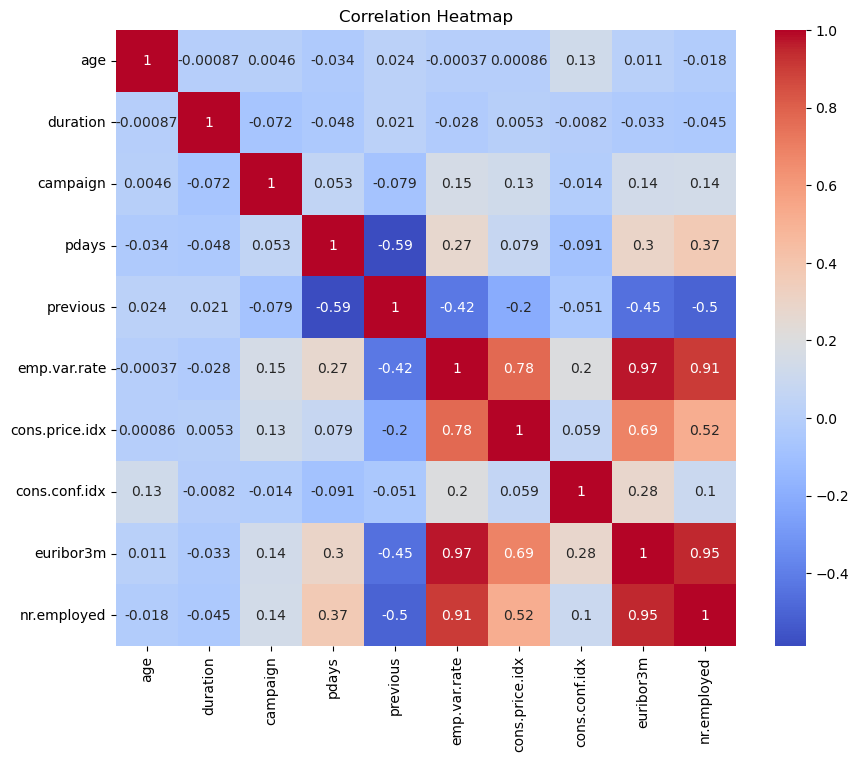

In [6]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


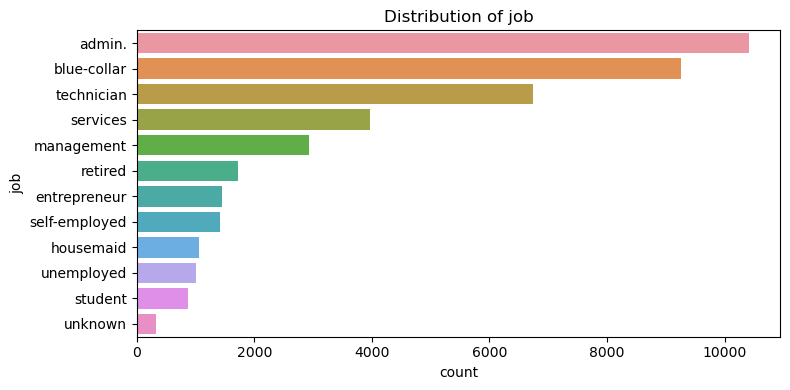

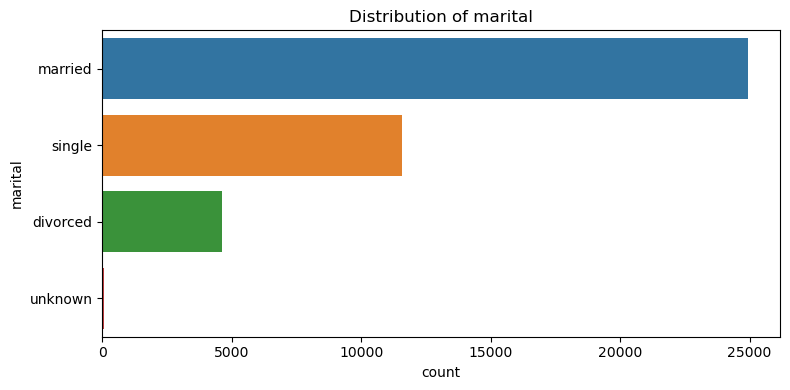

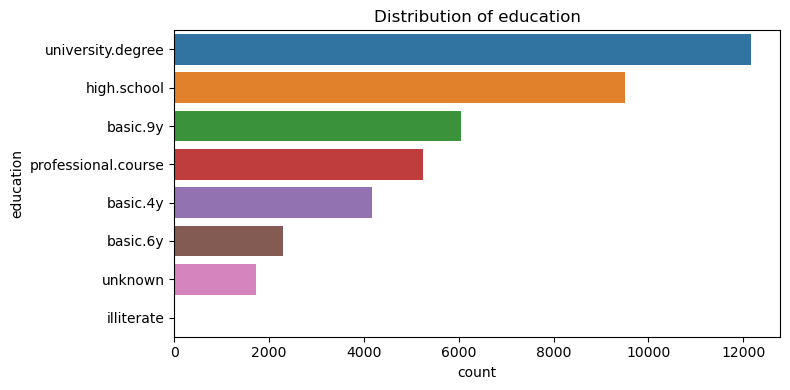

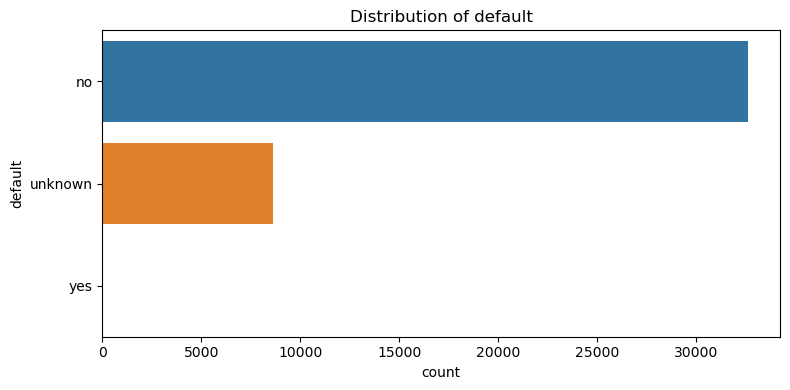

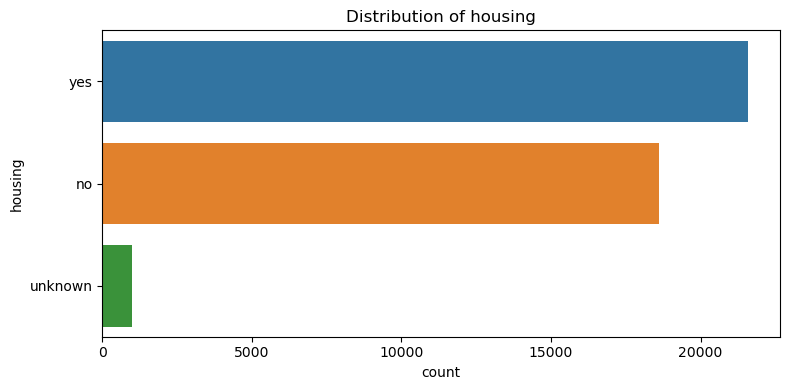

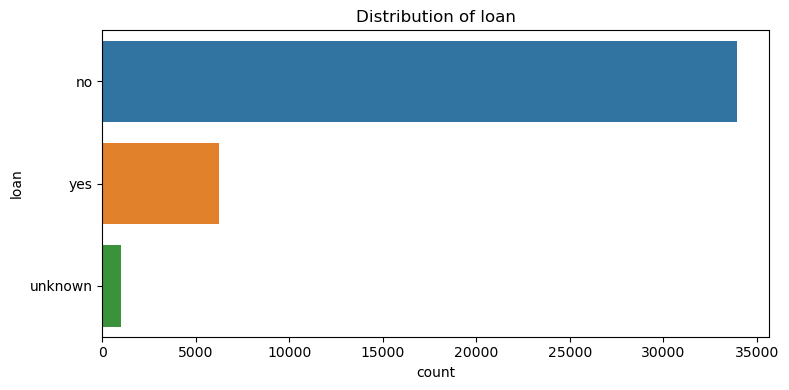

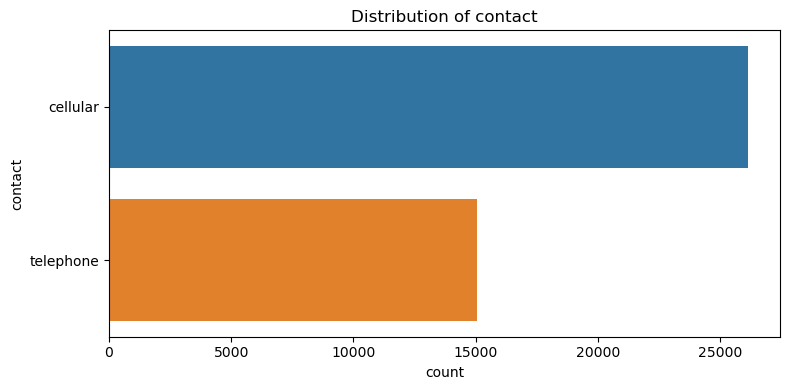

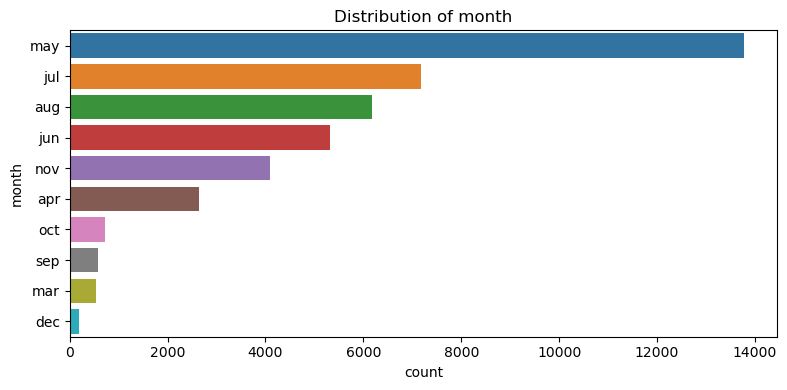

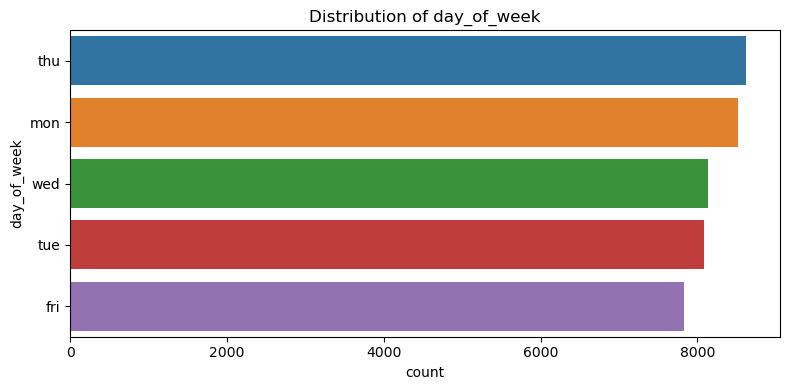

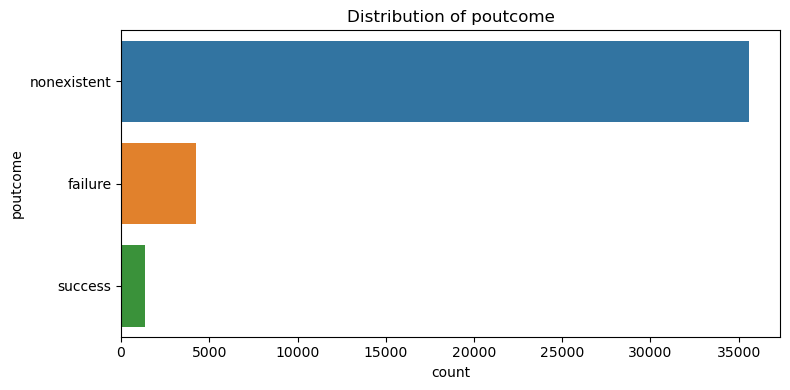

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns[:-1]  # exclude target

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [9]:
print("\nPreprocessed Dataset Info:")
print(df_encoded.info())



Preprocessed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid     

In [10]:
# df_encoded.to_csv('/mnt/data/bank_preprocessed.csv', index=False)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and Target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:\nMSE: {mse:.4f}\nR2 Score: {r2:.4f}")
    
    # Plotting
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

Linear Regression:
MSE: 0.0650
R2 Score: 0.3539


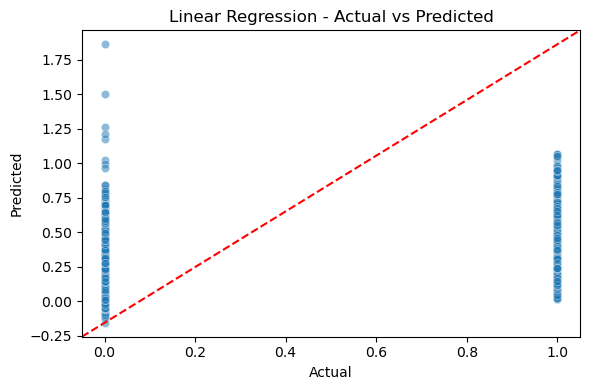

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, "Linear Regression")

Decision Tree Regressor:
MSE: 0.1128
R2 Score: -0.1208


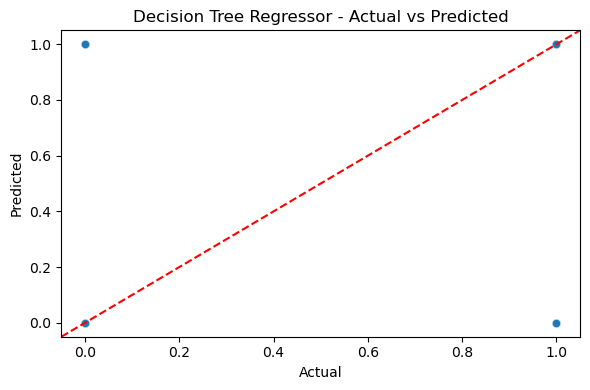

In [5]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree Regressor")


Random Forest Regressor:
MSE: 0.0592
R2 Score: 0.4111


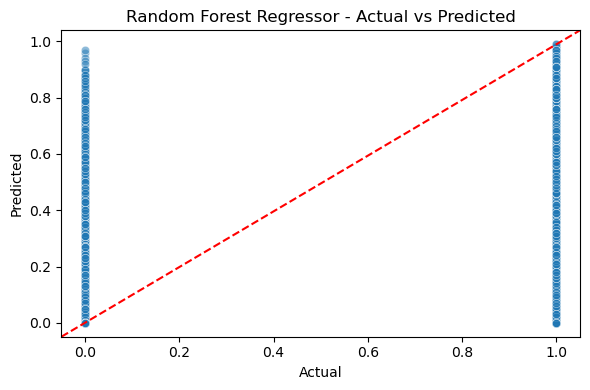

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest Regressor")

Gradient Boosting Regressor:
MSE: 0.0566
R2 Score: 0.4374


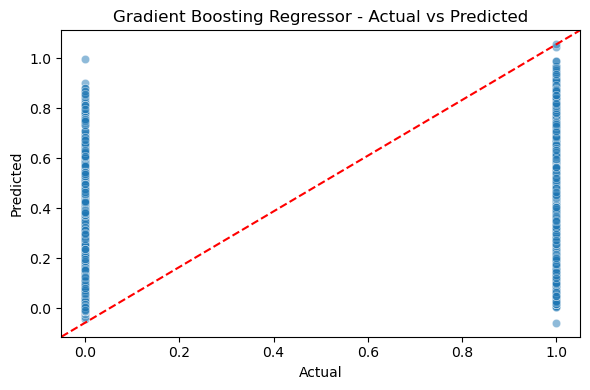

In [13]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
evaluate_model(gb, "Gradient Boosting Regressor")

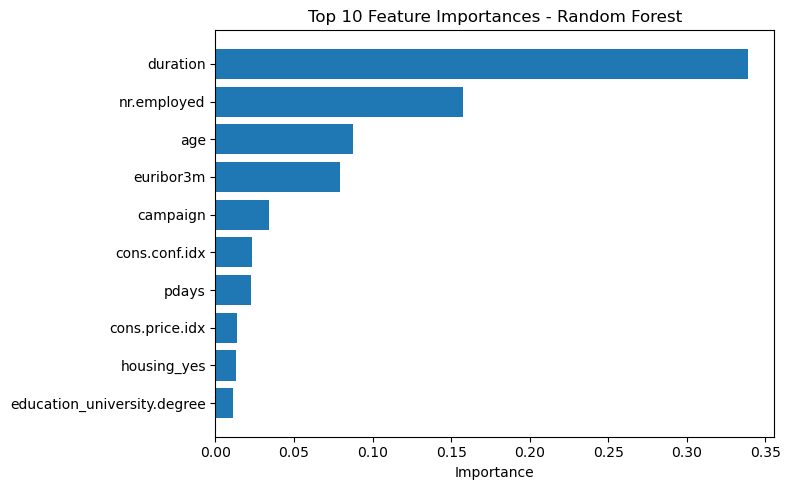

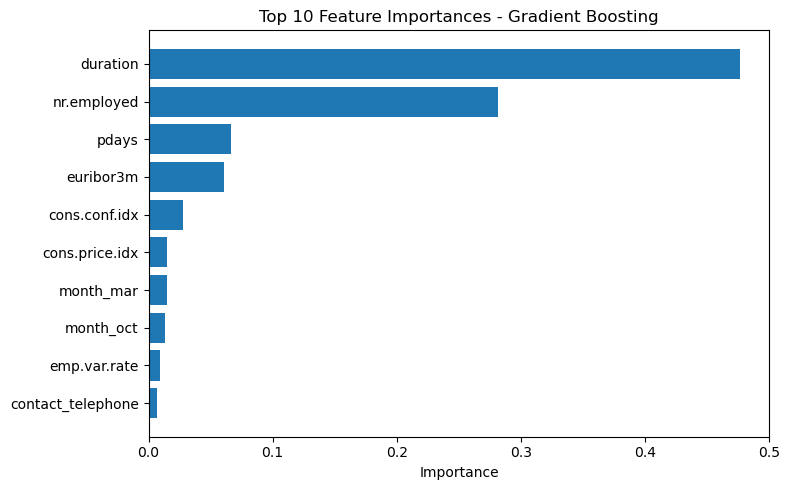

In [14]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)[-10:]  # Top 10 features
    
    plt.figure(figsize=(8, 5))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title(f"Top 10 Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest")
plot_feature_importance(gb, "Gradient Boosting")